In [26]:
import pandas as pd
from dateutil.parser import parse
import dateutil.parser
import datetime
import numpy as np
from uszipcode import Zipcode
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
import plotly_express as px
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision',4)

# Goals / Methodology

__Goal:__
Our primary goal in this presentation is to maximize the number of signatures obtained at subway station entrances/exits via street marketing teams, focusing on those individuals who will attend the gala and contribute to WTWY’s cause.

__Methodology:__
To do so, we will look at MTA subway data as well as NYC Census data such as median household income to determine, not just the busiest stations, but the stations with the most value-added individuals considering our prompt above. Furthermore, we will look at the number of tech companies near stations to determine best allotment of street marketing team placement to properly capture our target group



# Importing Data

In [5]:
# helper function to read in data for appropriate dates
week_nums = [200905, 200912, 200919]

def get_data(week_nums):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    df = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        df.append(pd.read_csv(file_url))
    return pd.concat(df)

In [6]:
# read in data
mta = get_data(week_nums)

In [7]:
mta.shape

(628297, 11)

# Finding zipcode and demographic data for stations

In [8]:
# subset for only unique station names
unique_station = mta.drop_duplicates(subset=['STATION']).reset_index()

In [9]:
geolocator = Nominatim(user_agent="test_app")

# find unique latitude and longitude for each station
lat_long = []
for station in unique_station.STATION:
    try:
        loc = geolocator.geocode(f'{station} Station NYC')
        lat_long.append([station, (loc.latitude, loc.longitude)])
    # if cannot identify station name print the specific station
    except:
        print(station)



TIMES SQ-42 ST
WHITEHALL S-FRY
PARK PLACE
JAY ST-METROTEC
ATL AV-BARCLAY
CONEY IS-STILLW
W 8 ST-AQUARIUM
NEW LOTS
CANARSIE-ROCKAW
75 ST-ELDERTS
85 ST-FOREST PK
163 ST-AMSTERDM
81 ST-MUSEUM
59 ST COLUMBUS
42 ST-PORT AUTH
34 ST-PENN STA
HOYT-SCHER
CLINTON-WASH AV
BROADWAY JCT
OZONE PK LEFFRT
AQUEDUCT N.COND
AQUEDUCT RACETR
161/YANKEE STAD
JKSN HT-ROOSVLT
GRAND-NEWTOWN
MYRTLE-WILLOUGH
BEDFORD-NOSTRAN
47-50 STS ROCK
SMITH-9 ST
4 AV-9 ST
15 ST-PROSPECT
ROOSEVELT ISLND
21 ST-QNSBRIDGE
JAMAICA VAN WK
SUTPHIN-ARCHER
JAMAICA CENTER
72 ST-2 AVE
86 ST-2 AVE
96 ST-2 AVE
NEWARK HW BMEBE
JOURNAL SQUARE
PAVONIA/NEWPORT
TWENTY THIRD ST
THIRTY ST
LACKAWANNA
THIRTY THIRD ST
NEWARK BM BW
NEWARK C
NEWARK HM HE
PATH WTC 2
PATH NEW WTC
66 ST-LINCOLN
116 ST-COLUMBIA
137 ST CITY COL
GRD CNTRL-42 ST
68ST-HUNTER CO
138/GRAND CONC
149/GRAND CONC
WEST FARMS SQ
E 143/ST MARY'S
MORISN AV/SNDVW
VERNON-JACKSON
82 ST-JACKSON H
103 ST-CORONA
34 ST-HUDSON YD
GRAND ARMY PLAZ
EASTN PKWY-MUSM
CROWN HTS-UTICA
SUTTER AV-RUTL

In [10]:
# add in latitude and longitude for missing stations
missing = [['TIMES SQ-42 ST', (40.7559, -73.9871)],['WHITEHALL S-FRY', (40.7017, -74.0129)], ['PARK PLACE', (40.7132, -74.0093)], ['JAY ST-METROTEC', (40.69218,-73.985942)], ['ATL AV-BARCLAY', (40.683666,-73.97881)], ['CONEY IS-STILLW', (40.577422,-73.981233)], ['W 8 ST-AQUARIUM', (40.576127,-73.975939)], ['NEW LOTS', (40.658733,-73.899232)], ['CANARSIE-ROCKAW', (40.646654,-73.90185)], ['75 ST-ELDERTS', (40.691324,-73.867139)], ['85 ST-FOREST PK', (40.692435,-73.86001)], ['163 ST-AMSTERDM', (40.836013,-73.939892)], ['81 ST-MUSEUM', (40.781433,-73.972143)], ['59 ST COLUMBUS', (40.768296,-73.981736)], ['42 ST-PORT AUTH', (40.757308,-73.989735)], ['34 ST-PENN STA', (40.752287,-73.993391)], ['HOYT-SCHER', (40.688484,-73.985001)], ['CLINTON-WASH AV', (40.683263,-73.965838)], ['BROADWAY JCT', (40.679498,-73.904512)], ['OZONE PK LEFFRT', (40.685951,-73.825798)], ['AQUEDUCT N.COND', (40.668234,-73.834058)], ['AQUEDUCT RACETR', (40.672097,-73.835919)], ['161/YANKEE STAD', (40.827905,-73.925651)], ['JKSN HT-ROOSVLT', (40.746644,-73.891338)], ['GRAND-NEWTOWN', (40.737015,-73.877223)], ['MYRTLE-WILLOUGH', (40.694568,-73.949046)], ['BEDFORD-NOSTRAN', (40.689627,-73.953522)], ['47-50 STS ROCK', (40.758663,-73.981329)], ['SMITH-9 ST', (40.67358,-73.995959)], ['4 AV-9 ST', (40.670387, -73.98848)], ['15 ST-PROSPECT', (40.660365,-73.979493)], ['ROOSEVELT ISLND', (40.759145,-73.95326)], ['21 ST-QNSBRIDGE', (40.754203,-73.942836)], ['JAMAICA VAN WK', (40.709179,-73.820574)], ['SUTPHIN-ARCHER', (40.700486,-73.807969)], ['JAMAICA CENTER', (40.702147,-73.801109)], ['72 ST-2 AVE', (40.768799,-73.958424)], ['86 ST-2 AVE', (40.777891,-73.951787)], ['96 ST-2 AVE', (40.784318,-73.947152)], ['JOURNAL SQUARE', (40.732141, -74.063114)], ['PAVONIA/NEWPORT', (40.726676, -74.034757)], ['TWENTY THIRD ST', (40.741339, -73.989272)], ['THIRTY ST', (40.766859, -73.921423)], ['LACKAWANNA', (40.7359352, -74.0273625)], ['THIRTY THIRD ST', (40.7486, -73.9887)], ['NEWARK BM BW', (40.735657, -74.172363)], ['NEWARK HW BMEBE', (40.735657, -74.172363)], ['PATH WTC 2', (40.712742, -74.013382)], ['PATH NEW WTC', (40.712742, -74.013382)], ['66 ST-LINCOLN', (40.77344,-73.982209)], ['116 ST-COLUMBIA', (40.807722,-73.96411)], ['137 ST CITY COL', (40.821, -73.954)], ['GRD CNTRL-42 ST', (40.751776,-73.976848)], ['68ST-HUNTER CO', (40.768141,-73.96387)], ['138/GRAND CONC', (40.813224,-73.929849)], ['149/GRAND CONC', (40.818375,-73.927351)], ['WEST FARMS SQ', (40.840295,-73.880049)], ["E 143/ST MARY'S", (40.808719,-73.907657)], ['MORISN AV/SNDVW', (40.829495, -73.874474)], ['VERNON-JACKSON', (40.742626,-73.953581)], ['82 ST-JACKSON H', (40.747659,-73.883697)], ['103 ST-CORONA', (40.749865,-73.8627)], ['34 ST-HUDSON YD', (40.753821,-73.981963)], ['GRAND ARMY PLAZ', (40.675235,-73.971046)], ['EASTN PKWY-MUSM', (40.671987,-73.964375)], ['CROWN HTS-UTICA', (40.668897,-73.932942)], ['SUTTER AV-RUTLD', (40.664717,-73.92261)], ['FLATBUSH AV-B.C', (40.632836,-73.947642)], ['EASTCHSTER/DYRE', (40.8883,-73.830834)], ['RIT-MANHATTAN', (43.0844, -77.6749)], ['RIT-ROOSEVELT', (43.0844, -77.6749)]]

In [11]:
station_lat_long = lat_long + missing

In [12]:
# search latitude and longitude to get zipcode, population, population density, median household income
search = SearchEngine(simple_zipcode=True)
zip_list = []
for i in range(len(station_lat_long)):
    try:
        zipcode = search.by_coordinates(station_lat_long[i][1][0], station_lat_long[i][1][1], returns=1)
        zip_list.append([station_lat_long[i][0], station_lat_long[i][1][0], station_lat_long[i][1][1], zipcode[0].zipcode, zipcode[0].population, zipcode[0].population_density, zipcode[0].median_household_income])
    # see if there is no match 
    except:
        print(station_lat_long[i][0])



In [13]:
# make the list into a dataframe
station_zip_demo = pd.DataFrame(zip_list, columns=['STATION', 'Latitude', 'Longitude', 'ZIPCODE', 'POPULATION', 'POPULATION_DEN', 'MEDIAN_INCOME'])

station_zip_demo.head()

,STATION,Latitude,Longitude,ZIPCODE,POPULATION,POPULATION_DEN,MEDIAN_INCOME
0,59 ST,40.6414,-74.0179,11220,99598,55603.0,37580.0
1,5 AV/59 ST,40.7648,-73.9727,10153,0,NaN,NaN
2,57 ST-7 AV,40.7647,-73.9806,10103,3,314.0,NaN
3,49 ST,40.7599,-73.9841,10020,0,NaN,NaN
4,34 ST-HERALD SQ,40.7496,-73.9879,10001,21102,33959.0,81671.0


# Finding tech company zipcode 

In [15]:
company = pd.read_excel('company.xlsx')

In [16]:
# find latitude and longitude based on compnay name
lat_long = []
for company in company.Company:
    try:
        loc = geolocator.geocode(f'{company} NY, USA')
        lat_long.append([company, loc.latitude, loc.longitude])
    # see companies that have no associated latitude and longitude
    except:
        print(company)

Deloitte
PricewaterhouseCoopers
ABM Industries
Standard Chartered USA
Omnicom Group
Philip Morris International
Historic TW
BOTTLING GROUP
Marsh & McLennan Companies
NBCUniversal
The Interpublic Group of Companies
American International Group
Arconic
Mount Sinai Health System
Kohlberg & Company
Colgate-Palmolive
iQor Holdings
Bunge
Mediterranean Shipping Company
Hyosung
MacAndrews & Forbes
Montefiore Health System
NIOXIN USA
Clairol Color
Carrols Restaurant Group
PVH
Hotel Acquisition Company
Weight Watchers International
Henry Schein
Roadhouse Holding
Infor
HRG Group
Xylem
Altice USA
Young & Rubicam
Hitachi America
Assurant
Continental Grain Company
Waldorf Astoria New York
Sutherland Global Services
Nature’s Bounty
KBC Bank


In [17]:
# add additional tech companies 
company_address = [['Slack', '436 Lafayette St, New York, NY 10003'], ['2U', '55 Prospect St., Brooklyn, NY 11201'], ['Compass', '90 Fifth Avenue, New York, NY 10011'],['Adobe', '1540 Broadway, New York, NY 10036'], ['Square', '375 W Broadway, New York, NY 10012'], ['Twitter', '249 W 17th St, New York, NY 10011'],['Facebook', '770 Broadway, New York, NY 10003'], ['Google', '111 8th Ave, New York, NY 10011'], ['Salesforce', '1095 Avenue of the Americas, New York, NY 10036'], ['Amazon', '450 West 33rd Street, New York, NY 10001'], ['Dashlane', '156 5th Ave, New York, NY 10010'], ['Transferwise', '19 W 24th Street, New York, NY 10010'], ['Sevenrooms', '122 W. 27th Street, New York, NY 10001'], ['seatgeek', '400 Lafayette St, New York, NY 10003, US'], ['greenhouse', '18 W 18th St, New York, NY 10011']]

for company, address in company_address:
    try:
        loc = geolocator.geocode(address)
        lat_long.append([company, loc.latitude, loc.longitude])
    except:
        print(company)

In [18]:
#make the list into dataframe
company_zip = pd.DataFrame(lat_long, columns=['Company', 'Latitude', 'Longitude'])


In [337]:
fig = px.scatter_mapbox(company_zip, 'Latitude', 'Longitude')
fig.show()

# Preprocess MTA data

In [219]:
# remove trailing spaces in column names
mta.columns = [col.strip() for col in mta.columns]

# create a single new column with Date and Time combined
mta['DATETIME'] = pd.to_datetime(mta['DATE'] + " " + mta['TIME'])

# Get rid of the duplicate entry
mta.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True, ascending=False)
mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)


# MTA Data Analysis

## Entries / Exits

In [220]:
# group by unique turnstile identifiers
# take the minimum entry value 
entries_by_date = mta.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])['ENTRIES', 'EXITS'].min().reset_index()

In [221]:
# shift the rows down by one and create a previous entries/exits on the same row
entries_by_date[["PREV_DATE", 'PREV_ENTRIES', 'PREV_EXITS']] = (entries_by_date.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATETIME", 'ENTRIES', 'EXITS'].apply(lambda x: x.shift(1)))


In [222]:
# Drop the rows for the earliest date in the data
entries_by_date.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [223]:
entries_by_date['DAILY_ENTRIES'] = entries_by_date['ENTRIES']-entries_by_date['PREV_ENTRIES']
entries_by_date['DAILY_EXITS'] = entries_by_date['EXITS'] - entries_by_date['PREV_EXITS']

In [224]:
# set negative entry values to positive values 
entries_by_date['DAILY_ENTRIES'] = entries_by_date['DAILY_ENTRIES'].apply(lambda x: abs(x) if x<0 else x)
entries_by_date['DAILY_EXITS'] = entries_by_date['DAILY_EXITS'].apply(lambda x: abs(x) if x<0 else x)

In [225]:
# set excessively large entries to NaN
entries_by_date.loc[(entries_by_date['DAILY_ENTRIES']>100000) | (entries_by_date['DAILY_ENTRIES']==0)] = np.nan
entries_by_date.loc[(entries_by_date['DAILY_EXITS']>100000) | (entries_by_date['DAILY_EXITS']==0)] = np.nan


In [226]:
# add up daily entries and exits to get total traffic
entries_by_date['TOTAL_TRAFFIC'] = entries_by_date['DAILY_ENTRIES'] + entries_by_date['DAILY_EXITS']

## Group by station / total traffic for september 

In [227]:
# group by station to get total entries for the month of september for each station
station_traffic = entries_by_date.groupby('STATION')['TOTAL_TRAFFIC'].sum().sort_values(ascending=False).reset_index()
station_traffic.head(10)

,STATION,TOTAL_TRAFFIC
0,34 ST-PENN STA,1271545.0
1,34 ST-HERALD SQ,1039988.0
2,125 ST,972648.0
3,86 ST,950062.0
4,14 ST-UNION SQ,878973.0
5,GRD CNTRL-42 ST,872828.0
6,42 ST-PORT AUTH,852579.0
7,23 ST,765142.0
8,FLUSHING-MAIN,751172.0
9,FULTON ST,704916.0


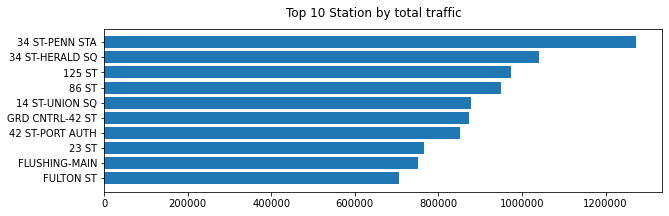

In [465]:
fig, ax = plt.subplots(figsize=(10,3))
ax.barh(station_traffic.head(10).STATION, station_traffic.head(10).TOTAL_TRAFFIC)
fig.suptitle('Top 10 Station by total traffic')
ax.invert_yaxis()
ax.xaxis.get_major_formatter().set_scientific(False)



## Stations that are nearby high median income areas / high in women population

In [228]:
# add zipcode / demographic data to the station_traffic data
station_high_income = pd.merge(station_traffic, station_zip_demo, on='STATION', right_index=False)
station_high_income.head()

,STATION,TOTAL_TRAFFIC,Latitude,Longitude,ZIPCODE,POPULATION,POPULATION_DEN,MEDIAN_INCOME
0,34 ST-PENN STA,1271545.0,40.7523,-73.9934,10119,92,5592.0,NaN
1,34 ST-HERALD SQ,1039988.0,40.7496,-73.9879,10001,21102,33959.0,81671.0
2,125 ST,972648.0,40.8043,-73.9374,10035,33969,24329.0,24533.0
3,86 ST,950062.0,40.7795,-73.9555,10028,45141,143683.0,104638.0
4,14 ST-UNION SQ,878973.0,40.7358,-73.9906,10003,56024,97188.0,92540.0


In [232]:
# read in census data with women population
population_zip = pd.read_csv('population_by_zip_2010.csv')

In [233]:
# find unique station zip code 
ny_zipcode = station_high_income['ZIPCODE'].unique().tolist()

In [234]:
# get rid of any unnecessary zip codes
population_zip = population_zip.loc[population_zip['zipcode'].isin(ny_zipcode)]

In [235]:
# subset for only female population
population_zip = population_zip.loc[population_zip['gender'] == 'female']
population_zip['ZIPCODE'] = population_zip['zipcode']

In [236]:
population_zip.drop(columns=['minimum_age', 'maximum_age', 'geo_id', 'gender', 'zipcode'], inplace=True)
population_zip['ZIPCODE'] = population_zip['ZIPCODE'].astype(str)

In [237]:
population_zip = population_zip.sort_values('population', ascending=False).drop_duplicates('ZIPCODE')

In [238]:
station_high_income = pd.merge(station_high_income, population_zip, on='ZIPCODE')

In [239]:
# zip codes with highest home values in nyc
wealthiest_zip = ['10013', '10007', '10012', '10001', '10014', '10010', '10011', '10282', '10018']
station_high_income =station_high_income[station_high_income['ZIPCODE'].isin(wealthiest_zip)].sort_values(ascending=False, by='MEDIAN_INCOME')

In [240]:
station_high_income.sort_values('population', ascending=False)

,STATION,TOTAL_TRAFFIC,Latitude,Longitude,ZIPCODE,POPULATION,POPULATION_DEN,MEDIAN_INCOME,population
22,9TH STREET,49212.0,40.7341,-73.9996,10011,50984,77436.0,104238.0,24986
24,6 AV,37327.0,40.7375,-73.9971,10011,50984,77436.0,104238.0,24986
19,14TH STREET,137353.0,40.7379,-74.0002,10011,50984,77436.0,104238.0,24986
20,4AV-9 ST,93878.0,40.7341,-73.9996,10011,50984,77436.0,104238.0,24986
21,TWENTY THIRD ST,58007.0,40.7413,-73.9893,10011,50984,77436.0,104238.0,24986
16,23 ST,765142.0,40.7441,-73.9956,10011,50984,77436.0,104238.0,24986
17,14 ST,493930.0,40.7379,-74.0002,10011,50984,77436.0,104238.0,24986
18,8 AV,332609.0,40.7399,-74.0027,10011,50984,77436.0,104238.0,24986
23,18 ST,49079.0,40.7410,-73.9979,10011,50984,77436.0,104238.0,24986
275,CHRISTOPHER ST,129176.0,40.7330,-74.0069,10014,31959,56119.0,108483.0,16328


### Recommended Stations based on total traffic / median income / population of women 
- 14 ST, 23 ST, W 4 ST-WASH SQ, 28 ST, 34 ST-HERALD SQ, CHAMBERS ST


### Visualizing the stations on a map 

In [27]:
# 2D map view of all station locations
fig = px.scatter_mapbox(station_zip_demo, 'Latitude', 'Longitude', zoom=11)
fig.update_traces(marker=dict(size=10))
fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [31]:
# visualize location of top tech companies 
fig = px.scatter_mapbox(company_zip, lat='Latitude', lon='Longitude', zoom=11,center=dict(lat=40.77949,lon=-73.95553))
fig.update_traces(marker=dict(color='green'))
fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



In [32]:
recommended_stations = station_zip_demo.loc[(station_zip_demo['STATION'] == '23 ST') | (station_zip_demo['STATION'] == '14 ST') | (station_zip_demo['STATION'] == '28 ST ') | (station_zip_demo['STATION'] == '34 ST-HERALD SQ') | (station_zip_demo['STATION'] == 'W 4 ST-WASH SQ') | (station_zip_demo['STATION'] == '28 ST') | (station_zip_demo['STATION'] == 'CHAMBERS ST')]

In [37]:
# visualize tech companies superimposed on map of tech company locations
fig = px.scatter_mapbox(company_zip, lat='Latitude', lon='Longitude', zoom=11,center=dict(lat=40.77949,lon=-73.95553))
fig.update_traces(marker=dict(color='green'))

# Plot each station of interest onto the map 
fig.add_trace(px.scatter_mapbox(recommended_stations, lat='Latitude', lon='Longitude',color='STATION').data[0])
fig.add_trace(px.scatter_mapbox(recommended_stations, lat='Latitude', lon='Longitude',color='STATION').data[1])
fig.add_trace(px.scatter_mapbox(recommended_stations, lat='Latitude', lon='Longitude',color='STATION').data[2])
fig.add_trace(px.scatter_mapbox(recommended_stations, lat='Latitude', lon='Longitude',color='STATION').data[3])
fig.add_trace(px.scatter_mapbox(recommended_stations, lat='Latitude', lon='Longitude',color='STATION').data[4])
fig.add_trace(px.scatter_mapbox(recommended_stations, lat='Latitude', lon='Longitude',color='STATION').data[5])

fig.update_traces(marker=dict(size=11))
fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [29]:
fig = px.scatter_mapbox(company_zip, lat='Latitude', lon='Longitude', zoom=11,center=dict(lat=40.77949,lon=-73.95553))
fig.update_traces(marker=dict(color='green'))

## Group by day of the week

In [20]:
entries_by_day_of_week = entries_by_date.copy(deep=True)

In [21]:
entries_by_day_of_week['DAY_OF_WEEK'] = entries_by_day_of_week.DATETIME.dt.day_name()

In [22]:
entries_by_day_of_week = entries_by_day_of_week.groupby(['STATION', 'DAY_OF_WEEK'])['TOTAL_TRAFFIC'].sum().reset_index()

Text(0.5, 1.0, 'Traffic flow by day of the week')

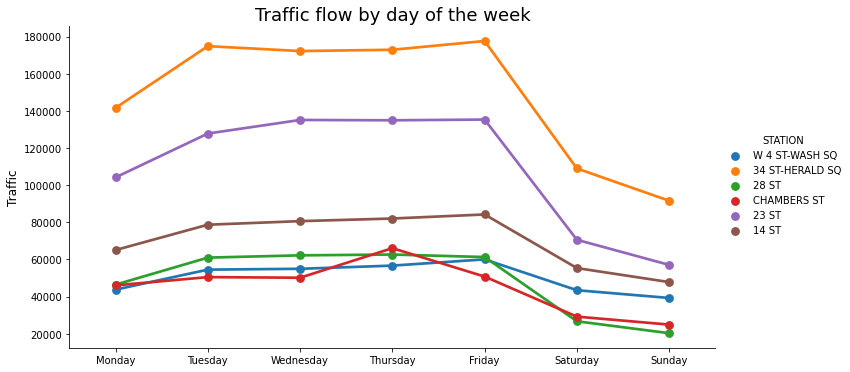

In [244]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot('DAY_OF_WEEK', 'TOTAL_TRAFFIC', kind='point',hue='STATION',order=order, hue_order=['W 4 ST-WASH SQ', '34 ST-HERALD SQ','28 ST', 'CHAMBERS ST', '23 ST', '14 ST'], aspect=2, data=entries_by_day_of_week)
plt.xlabel('')
plt.ylabel('Traffic', size=12)
plt.title('Traffic flow by day of the week', size=18)


In [33]:
entries_weekday = entries_by_day_of_week.loc[entries_by_day_of_week['DAY_OF_WEEK'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

In [36]:
entries_weekday.groupby(['STATION']).TOTAL_TRAFFIC.sum().sort_values(ascending=False).head(10)

STATION
34 ST-PENN STA     1033680.0
34 ST-HERALD SQ     839347.0
86 ST               779054.0
125 ST              767465.0
GRD CNTRL-42 ST     741495.0
42 ST-PORT AUTH     696475.0
14 ST-UNION SQ      692462.0
23 ST               637453.0
FLUSHING-MAIN       599926.0
FULTON ST           584623.0
Name: TOTAL_TRAFFIC, dtype: float64

In [37]:
entries_weekend = entries_by_day_of_week.loc[entries_by_day_of_week['DAY_OF_WEEK'].isin(['Saturday', 'Sunday'])]

In [38]:
entries_weekend.groupby('STATION').TOTAL_TRAFFIC.sum().sort_values(ascending=False).head(10)

STATION
34 ST-PENN STA     237865.0
125 ST             205183.0
34 ST-HERALD SQ    200641.0
14 ST-UNION SQ     186511.0
86 ST              171008.0
PATH NEW WTC       170308.0
42 ST-PORT AUTH    156104.0
FLUSHING-MAIN      151246.0
JKSN HT-ROOSVLT    134000.0
GRD CNTRL-42 ST    131333.0
Name: TOTAL_TRAFFIC, dtype: float64

## Group by time (4 hours)

In [24]:
entries_by_time = entries_by_date.copy(deep=True)

In [25]:
entries_by_time = entries_by_time.groupby('STATION').resample('4H', on='DATETIME').sum().reset_index()

In [26]:
entries_by_time['TIME'] = entries_by_time['DATETIME'].dt.time

In [27]:
#rename time labels for clarification
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(0, 0), 'label'] = '8pm-12am'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(4, 0), 'label'] = '12am-4am'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(8, 0), 'label'] = '4am-8am'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(12, 0), 'label'] = '8am-12pm'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(16, 0), 'label'] = '12pm-4pm'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(20, 0), 'label'] = '4pm-8pm'

In [28]:
entries_by_time = entries_by_time.groupby(['STATION', 'label'])['TOTAL_TRAFFIC'].sum().reset_index().sort_values(by='TOTAL_TRAFFIC', ascending=False)

In [242]:
top_stations = entries_by_time.loc[(entries_by_time['STATION'] == '23 ST') | (entries_by_time['STATION'] == '14 ST') | (entries_by_time['STATION'] == '28 ST ') | (entries_by_time['STATION'] == '34 ST-HERALD SQ') | (entries_by_time['STATION'] == 'W 4 ST-WASH SQ') | (entries_by_time['STATION'] == '28 ST') | (entries_by_time['STATION'] == 'CHAMBERS ST')]

Text(0.5, 1.0, 'Traffic by time of day')

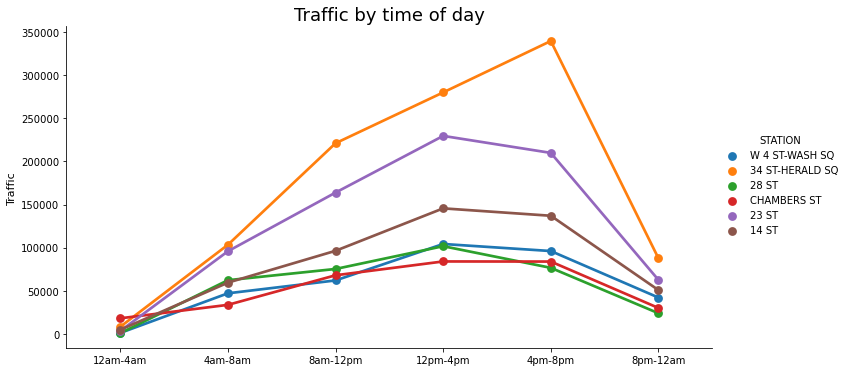

In [245]:
order = ['12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am']
sns.catplot('label', 'TOTAL_TRAFFIC', kind='point', hue='STATION', aspect =2, order=order, hue_order=['W 4 ST-WASH SQ', '34 ST-HERALD SQ','28 ST', 'CHAMBERS ST', '23 ST', '14 ST'], data=top_stations)
plt.xlabel('')
plt.ylabel('Traffic', size=11)
plt.title('Traffic by time of day', size=18)




## Day of the week

In [232]:
entries_by_date['DAY_OF_WEEK'] = entries_by_date['DATETIME'].dt.day_name()

In [233]:
entries_by_day_of_week = entries_by_date.groupby(['STATION', 'DAY_OF_WEEK'])['TOTAL_TRAFFIC'].sum().reset_index()

In [234]:
entries_weekday = entries_by_day_of_week.loc[entries_by_day_of_week['DAY_OF_WEEK'].isin(['Monday', 'Tuseday', 'Wednesday', 'Thursday', 'Friday'])]

In [237]:
entries_weekend = entries_by_day_of_week.loc[entries_by_day_of_week['DAY_OF_WEEK'].isin(['Saturday', 'Sunday'])]